In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import copy

In [32]:
class Match(object):

    def __init__(self, target, template):
        self.target = target
        self.template = template
        self.target_len_ver = len(target)
        self.target_len_hor = len(target[0])
        self.template_len_ver = len(template)
        self.template_len_hor = len(template[0])

    # NCCを計算し、分布と、値が1,2,3番目に小さい座標（左上）を取得する
    def search(self):
        distribution = np.zeros([self.target_len_ver-self.template_len_ver+1, self.target_len_hor-self.template_len_hor+1, 3])
        min_values = [1000, 1000, 1000]
        coordinates = [[0, 0], [0, 0], [0, 0]]
        for i in range(self.target_len_ver-self.template_len_ver+1):
            for j in range(self.target_len_hor-self.template_len_hor+1):
                scope = target[i:i+self.template_len_ver, j:j+self.template_len_hor]
                value = ncc(scope, template)
                distribution[i][j] = value

                if value <= min_values[0]:
                    min_values = [value, min_values[0], min_values[1]]
                    coordinates = [[i, j], coordinates[0], coordinates[1]]
                elif value <= min_values[1]:
                    min_values = [min_values[0], value, min_values[1]]
                    coordinates = [coordinates[0], [i, j], coordinates[1]]
                elif value <= min_values[2]:
                    min_values[2] = value
                    coordinates[2] = [i, j]

        # 0〜255の範囲になるように正規化する
        distribution = (distribution-np.min(distribution[:, :, 0])) / np.max(distribution[:, :, 0]) * 255
        distribution = distribution.astype('int64')

        # 上位3点に色をつける
        distribution[coordinates[0][0], coordinates[0][1]] = [255, 0, 0]
        distribution[coordinates[1][0], coordinates[1][1]] = [0, 255, 0]
        distribution[coordinates[2][0], coordinates[2][1]] = [0, 0, 255]

        # 座標を取得する
        self.coordinates = coordinates
        self.distribution = distribution

    # 画像を表示する
    def view(self):
        r = patches.Rectangle(xy=self.coordinates[0], width=self.template_len_hor, height=self.template_len_ver, ec='#FFFF00', fill=False)
        fig = plt.figure()
        ax = fig.add_subplot()
        plt.imshow(self.target)
        ax.add_patch(r)
        
    # 画像を保存する
    def save(self, img_name):
        r = patches.Rectangle(xy=self.coordinates[0], width=self.template_len_hor, height=self.template_len_ver, ec='#FFFF00', fill=False)
        fig = plt.figure()
        ax = fig.add_subplot()
        plt.imshow(self.target)
        ax.add_patch(r)
        plt.savefig(img_name)


# NCCを計算する
def ncc(scope, template):
    return np.sum(scope * template) / np.sqrt(np.sum(scope**2)*np.sum(template**2))

In [33]:
target = cv2.imread('gopochi-all.bmp')
template = cv2.imread('gopochi-template.bmp')

In [34]:
match = Match(target, template)

In [35]:
match.search()

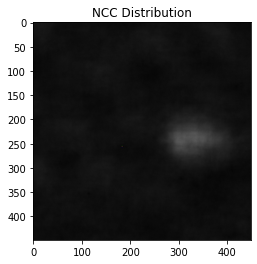

In [39]:
plt.imshow(match.distribution)
plt.title('NCC Distribution')
plt.savefig('distribution.png')

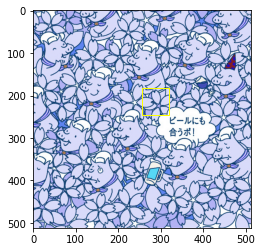

In [37]:
match.save('failure.png')

In [38]:
ar = np.array([[13.2, 42, 34, 12], [14, 31, 21, 41], [32, 42, 71, 90]])

In [25]:
ar = np.array([[[13,13,13,13], [1,42,42,42], [34,34,34,34], [12,12,12,12]], [[13,13,13,13], [42,42,42,42], [34,34,34,34], [12,12,12,12]], [[13,13,13,13], [42,42,42,42], [34,34,34,34], [12,12,12,12]]])